A look into 2225 different articles from the BBC beloning to 6 different classes.

Dataset: https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv

### Library imports

In [1]:
import csv # reading csv fil
import numpy as np # matrix operations
import matplotlib.pyplot as plt # plotting
import tensorflow as tf # deep learning
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

plt.style.use('fivethirtyeight')

### Reading Data

In [2]:
texts = []
labels = []
# stop words
stop_words = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
with open('data/bbc-text.csv','r') as file: # reading the files
    data = csv.reader(file)
    next(data, None)
    for row in data:
        labels.append(row[0])
        sentence = row[1]
        for word in stop_words: # replacing tokens with an empty space, and then replacing double space with a single space
            token = ' ' + word + ' '
            sentence = sentence.replace(token,' ')
            sentence = sentence.replace('  ', ' ')
        texts.append(sentence)

        
print(len(labels))
print(len(texts))

2225
2225


In [3]:
texts[0]

'tv future hands viewers home theatre systems plasma high-definition tvs digital video recorders moving living room way people watch tv will radically different five years time. according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend programmes content will delivered viewers via home networks cable satellite telecoms companies broadband service providers front rooms portable devices. one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes like us s tivo uk s sky+ system allow people record store play pause forward wind tv programmes want. essentially technology allows much personalised tv. also built-in high-definition tv sets big business japan us slower take off europe lack high-definition programming. not can people forward wind adverts can also forget abiding network channel schedules putting together a-la-carte entertainment. us networks cable satell

In [4]:
# hyper params
# tokenizer
vocab_size = 10000
oov_tok = '<OOV>'
# padding
padding_type = 'post'
trunc_type = 'post'
max_len = 120

# embedding
embedding_dim = 16


training_size = int(0.8 * len(texts)) # number of training data
# training data
training_texts = texts[:training_size]
training_labels = labels[:training_size]

# testing data
testing_texts = texts[training_size:]
testing_labels = labels[training_size:]



# initiate tokenizer fot training and testing texts
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
# fit on texts
tokenizer.fit_on_texts(training_texts)
word_index = tokenizer.word_index

# convert to sequences for training
sequences = tokenizer.texts_to_sequences(training_texts)
# add padding
padded = pad_sequences(sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)
print(padded[0])
print(padded.shape)
# testing data
test_sequences = tokenizer.texts_to_sequences(testing_texts)
padded_testing = pad_sequences(test_sequences,maxlen=max_len, padding=padding_type, truncating=trunc_type)
print(padded_testing.shape)

[  99  170 1157 1121   55  993  771 6583   97 1319 4308  139  186 3669
 1230 1211 1589   48    9  907   99    4 6113  347   93   24   17  140
 3276 1231 2436  585  465 1392   65 3393 3537 1674   10  935    4  745
   12  858    1   11  613 1590 1122  408    4 1954 1121  746   55  552
 1414 2027 1635  144  262  123 2370  809 4997  994  599   12 3972 3973
  935 2578  139  357  186 3669 7838 5333   45   69 2882   34   11    2
 4740   22    2 1320  146  429    9  153 1439   79 4520  449 4998   99
 1122   85 6114   90 2028   60 7839   99    8 1022  614   97 1319   99
 1977  141  147  433   11 2883   44   56]
(1780, 120)
(445, 120)


In [5]:

# tokenize labels
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(training_labels)
label_index = label_tokenizer.word_index
training_label_seq = np.array(label_tokenizer.texts_to_sequences(training_labels))
testing_label_seq = np.array(label_tokenizer.texts_to_sequences(testing_labels))
print(len(training_label_seq))
print(len(testing_label_seq))
print(label_index)

1780
445
{'sport': 1, 'business': 2, 'politics': 3, 'entertainment': 4, 'tech': 5}


In [6]:
print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(testing_label_seq[0])
print(testing_label_seq[1])
print(testing_label_seq[2])

[5]
[2]
[1]
(1780, 1)
[4]
[5]
[3]


In [7]:
reversed_label_index = dict([(value,key) for key,value in label_index.items()])
reversed_label_index

{1: 'sport', 2: 'business', 3: 'politics', 4: 'entertainment', 5: 'tech'}

### Building the Model

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_len), # embedding layer
    tf.keras.layers.GlobalAveragePooling1D(), # used to flatten the input into the next layer
    tf.keras.layers.Dense(24, activation='relu'), # a dense layer with 24 neurons
    tf.keras.layers.Dense(6, activation='softmax') # output layer
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 150       
Total params: 160,558
Trainable params: 160,558
Non-trainable params: 0
_________________________________________________________________


In [9]:
# introducing a callback to stop overfitting
target_acc = 0.999

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}): # evaluate at the end of epoch
        if (logs.get('accuracy') > target_acc):
            self.model.stop_training = True
            
callback = myCallback()

In [10]:
num_epochs = 30
history = model.fit(x=padded,
                   y=training_label_seq,
                   epochs=num_epochs,
                   validation_data=(padded_testing, testing_label_seq),
                   callbacks=[callback])

Epoch 1/30
56/56 [==============================] - 0s 5ms/step - loss: 1.7585 - accuracy: 0.4219 - val_loss: 1.7108 - val_accuracy: 0.4404
Epoch 2/30
56/56 [==============================] - 0s 2ms/step - loss: 1.6323 - accuracy: 0.5017 - val_loss: 1.5447 - val_accuracy: 0.5191
Epoch 3/30
56/56 [==============================] - 0s 2ms/step - loss: 1.3938 - accuracy: 0.6848 - val_loss: 1.2789 - val_accuracy: 0.6876
Epoch 4/30
56/56 [==============================] - 0s 2ms/step - loss: 1.0614 - accuracy: 0.8815 - val_loss: 0.9704 - val_accuracy: 0.8764
Epoch 5/30
56/56 [==============================] - 0s 2ms/step - loss: 0.7325 - accuracy: 0.9596 - val_loss: 0.6965 - val_accuracy: 0.9258
Epoch 6/30
56/56 [==============================] - 0s 2ms/step - loss: 0.4749 - accuracy: 0.9882 - val_loss: 0.5058 - val_accuracy: 0.9303
Epoch 7/30
56/56 [==============================] - 0s 2ms/step - loss: 0.3059 - accuracy: 0.9910 - val_loss: 0.3835 - val_accuracy: 0.9483
Epoch 8/30
56/56 [==

In [11]:
def plot_metrics(history, string):
    plt.figure(figsize=(12,7))
    plt.plot(history.history[string], label=string)
    plt.plot(history.history['val_'+string], label='val_'+string)
    plt.xlabel('Epochs')
    plt.ylabel(string.title())
    plt.legend(loc=5)
    plt.title(f'Training & Validation {string.title()}', fontsize=14)
    plt.show()

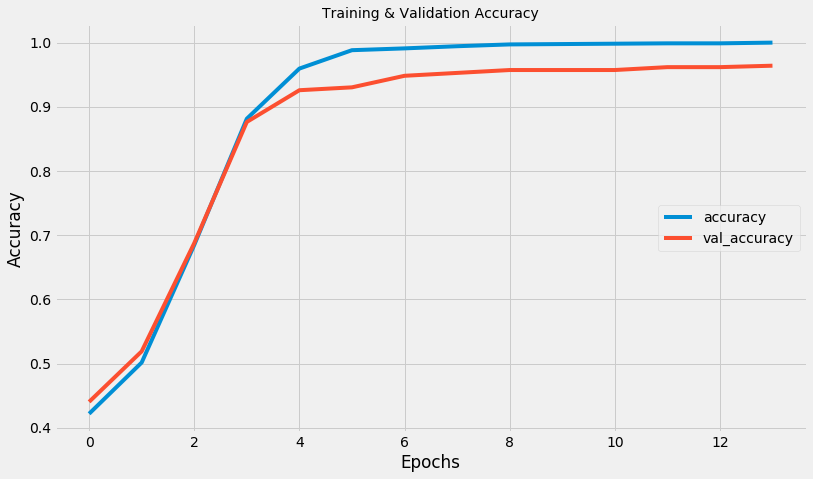

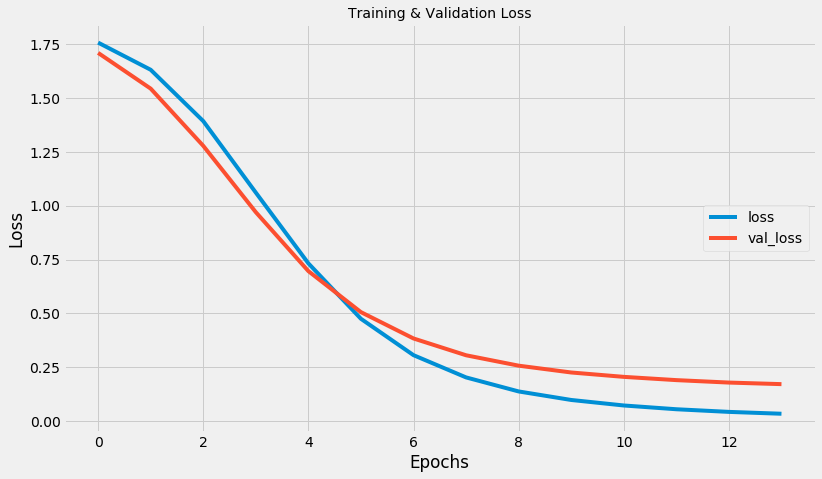

In [12]:
plot_metrics(history,'accuracy')
plot_metrics(history,'loss')

### Embedding Details

In [13]:
# get embedding layer 
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

(10000, 16)


In [14]:
reverse_word_index = dict([(value,key) for key,value in word_index.items()])

In [15]:
# saving vecs and meta
import io
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

for word_num in range(1, vocab_size):
    word = reverse_word_index[word_num]
    embeddings = weights[word_num]
    out_m.write(word+'\n')
    out_v.write('\t'.join([str(x) for x in embeddings])+'\n')

out_v.close()
out_m.close()